In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [150]:
df = pd.read_csv('C:/Users/shpva/OneDrive/Desktop/IndependentStudy_CIS5369/SM_Weather (4).csv',index_col='Date',parse_dates=True)
df1 = df.filter(['Date','TempAvg'])

In [151]:
df1.head()

,TempAvg
Date,
2021-10-01,61.4
2021-10-02,59.1
2021-10-03,61.5
2021-10-04,66.1
2021-10-05,69.6


<AxesSubplot:xlabel='Date'>

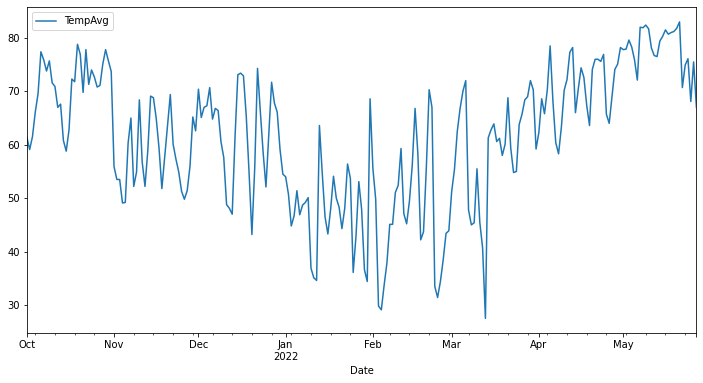

In [152]:
df1.plot(figsize=(12,6))

In [153]:
from statsmodels.tsa.seasonal import seasonal_decompose

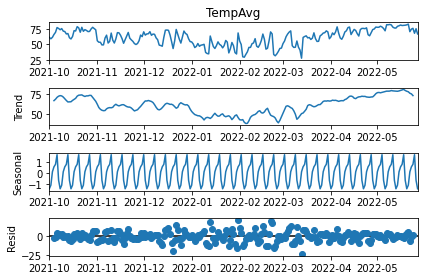

In [154]:
results = seasonal_decompose(df1['TempAvg'])
results.plot();

In [155]:
len(df1)

239

In [156]:
train = df1.iloc[:210]
test = df1.iloc[210:]

In [157]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [158]:
df1.head(),df1.tail()

(            TempAvg
 Date               
 2021-10-01     61.4
 2021-10-02     59.1
 2021-10-03     61.5
 2021-10-04     66.1
 2021-10-05     69.6,
             TempAvg
 Date               
 2022-05-23     74.9
 2022-05-24     76.1
 2022-05-25     68.1
 2022-05-26     75.5
 2022-05-27     67.0)

In [159]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [160]:
scaled_train[:10]

array([[0.66081871],
       [0.61598441],
       [0.66276803],
       [0.75243665],
       [0.82066277],
       [0.97270955],
       [0.94346979],
       [0.90253411],
       [0.93957115],
       [0.85964912]])

In [161]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [200]:
# define generator
n_input = 7 #seasonality component
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=256)

In [201]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.66081871 0.61598441 0.66276803 ... 0.74463938 0.71150097 0.81091618]
Predict this y: 
 [[0.90253411]
 [0.93957115]
 [0.85964912]
 [0.8460039 ]
 [0.76998051]
 [0.78167641]
 [0.64912281]
 [0.61013645]
 [0.68810916]
 [0.87329435]
 [0.86354776]
 [1.        ]
 [0.96296296]
 [0.8245614 ]
 [0.98050682]
 [0.85380117]
 [0.90643275]
 [0.88109162]
 [0.84405458]
 [0.84990253]
 [0.92787524]
 [0.98050682]
 [0.93957115]
 [0.9005848 ]
 [0.55360624]
 [0.50682261]
 [0.50682261]
 [0.42105263]
 [0.42300195]
 [0.63937622]
 [0.73099415]
 [0.48148148]
 [0.53411306]
 [0.79727096]
 [0.5711501 ]
 [0.48148148]
 [0.61208577]
 [0.81091618]
 [0.80506823]
 [0.72904483]
 [0.61988304]
 [0.47368421]
 [0.58674464]
 [0.7037037 ]
 [0.81676413]
 [0.63547758]
 [0.58089669]
 [0.53411306]
 [0.46393762]
 [0.43469786]
 [0.46588694]
 [0.55555556]
 [0.73489279]
 [0.68421053]
 [0.83625731]
 [0.73294347]
 [0.76998051]
 [0.77582846]
 [0.84210526]
 [0.72709552]
 [0.76608187]
 [0.7582846 ]
 [0.64522417]
 [0.586744

In [202]:
X.shape

(203, 7, 1)

In [203]:
#n_input = 7
#generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [204]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [205]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [206]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100)               40800     
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [207]:
model.fit(generator,epochs=50)

Epoch 1/50
1/1 [==============================] - 3s 3s/step - loss: 0.3806
Epoch 2/50
1/1 [==============================] - 0s 60ms/step - loss: 0.3605
Epoch 3/50
1/1 [==============================] - 0s 39ms/step - loss: 0.3407
Epoch 4/50
1/1 [==============================] - 0s 58ms/step - loss: 0.3210
Epoch 5/50
1/1 [==============================] - 0s 81ms/step - loss: 0.3015
Epoch 6/50
1/1 [==============================] - 0s 58ms/step - loss: 0.2821
Epoch 7/50
1/1 [==============================] - 0s 52ms/step - loss: 0.2629
Epoch 8/50
1/1 [==============================] - 0s 59ms/step - loss: 0.2439
Epoch 9/50
1/1 [==============================] - 0s 66ms/step - loss: 0.2253
Epoch 10/50
1/1 [==============================] - 0s 64ms/step - loss: 0.2069
Epoch 11/50
1/1 [==============================] - 0s 72ms/step - loss: 0.1886
Epoch 12/50
1/1 [==============================] - 0s 53ms/step - loss: 0.1703
Epoch 13/50
1/1 [==============================] - 0s 64ms/step

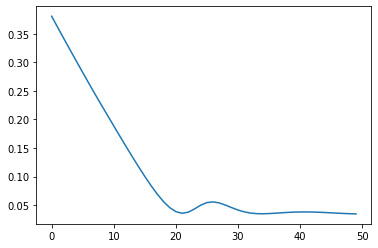

In [208]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [209]:
last_train_batch = scaled_train[-7:]

In [210]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [211]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 362ms/step


array([[0.78139913]], dtype=float32)

In [212]:
scaled_test[0]

array([0.92787524])

In [213]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 32ms/step


In [214]:
test_predictions

[array([0.78139913], dtype=float32),
 array([0.7637875], dtype=float32),
 array([0.744993], dtype=float32),
 array([0.72247165], dtype=float32),
 array([0.72114855], dtype=float32),
 array([0.72239214], dtype=float32),
 array([0.7118375], dtype=float32),
 array([0.6910011], dtype=float32),
 array([0.6816599], dtype=float32),
 array([0.67320013], dtype=float32),
 array([0.66590905], dtype=float32),
 array([0.66010743], dtype=float32),
 array([0.6537511], dtype=float32),
 array([0.6465937], dtype=float32),
 array([0.63991594], dtype=float32),
 array([0.6347124], dtype=float32),
 array([0.62993705], dtype=float32),
 array([0.6255425], dtype=float32),
 array([0.62143743], dtype=float32),
 array([0.6175066], dtype=float32),
 array([0.61383486], dtype=float32),
 array([0.6105294], dtype=float32),
 array([0.607568], dtype=float32),
 array([0.6048341], dtype=float32),
 array([0.6023096], dtype=float32),
 array([0.59997463], dtype=float32),
 array([0.5978214], dtype=float32),
 array([0.5958502]

In [215]:
test.head()

,TempAvg,Predictions
Date,,
2022-04-29,75.1,72.522113
2022-04-30,78.2,69.236240
2022-05-01,77.8,66.960891
2022-05-02,77.9,65.556973
2022-05-03,79.6,65.124667


In [216]:
true_predictions = scaler.inverse_transform(test_predictions)

In [217]:
test['Predictions'] = true_predictions

<ipython-input-217-920b79c3c314>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<AxesSubplot:xlabel='Date'>

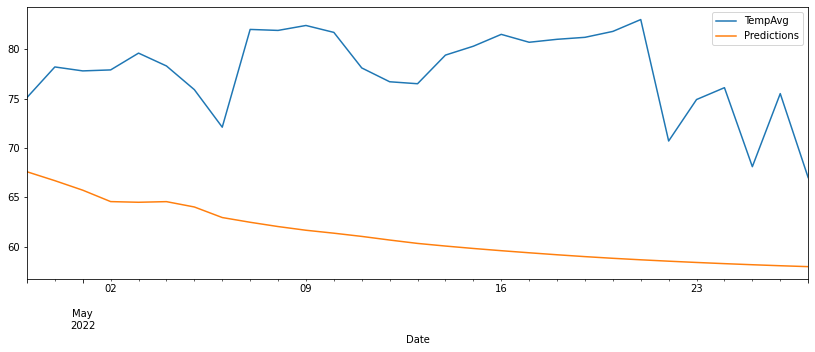

In [218]:
test.plot(figsize=(14,5))

In [219]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['TempAvg'],test['Predictions']))
print(rmse)

17.244820617185347
